# Group 4 Assignment 2 

### Authors: 
-  Chin Yee Wan 
-  Darrel Koh
-  Nguyen Gia Khanh 
-  Ngo Vu Anh	

# Discover and Visualise the Data

## Import Libraries

In [1]:
# import datascience libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyspark.sql.functions as F
from pyspark.sql.types import *

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Group4 Assignment 2').getOrCreate()


### Read in file

In [2]:
train_df = spark.read.option("header", "true").csv('./GA2Datasets/UNSW_NB15_training-set.csv')
test_df = spark.read.option("header", "true").csv('./GA2Datasets/UNSW_NB15_testing-set.csv')

# Optional: 
features_df = spark.read.option("header", "true").csv('./GA2Datasets/NUSW-NB15_features.csv')

## Functions definition 

##### For visualisation

In [3]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

## Data Exploration

### Convert Spark to Pandas

In [4]:
# Convert Spark DataFrames to Pandas
train_df_pandas = train_df.toPandas()
test_df_pandas = test_df.toPandas()
features_df_pandas = features_df.toPandas()

### Explore the Features set

In [5]:
features_df_pandas.head(20)
# features_df.show()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


### Explore Training Dataset

In [6]:
# train_df_pandas
# train_df.show()
train_df

id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632,0,0,0,0.011,0,0,0,0,0,0,0,0,0,0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000,0,0,0,0.008,0,0,0,0,0,0,0,0,0,0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000,0,0,0,0.005,0,0,0,0,0,0,0,0,0,0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000,0,0,0,0.006,0,0,0,0,0,0,0,0,0,0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,0.00001,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
6,0.000003,udp,-,INT,2,0,784,0,333333.3215,254,0,1045333312,0,0,0,0.003,0,0,0,0,0,0,0,0,0,0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,0.000006,udp,-,INT,2,0,1960,0,166666.6608,254,0,1306666624,0,0,0,0.006,0,0,0,0,0,0,0,0,0,0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,197714288,0,0,0,0.028,0,0,0,0,0,0,0,0,0,0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
9,0,arp,-,INT,1,0,46,0,0,0,0,0,0,0,0,60000.688,0,0,0,0,0,0,0,0,0,0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
10,0,arp,-,INT,1,0,46,0,0,0,0,0,0,0,0,60000.712,0,0,0,0,0,0,0,0,0,0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


In [7]:
train_df_pandas.info()
# train_df.printSchema()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 82332 non-null  object
 1   dur                82332 non-null  object
 2   proto              82332 non-null  object
 3   service            82332 non-null  object
 4   state              82332 non-null  object
 5   spkts              82332 non-null  object
 6   dpkts              82332 non-null  object
 7   sbytes             82332 non-null  object
 8   dbytes             82332 non-null  object
 9   rate               82332 non-null  object
 10  sttl               82332 non-null  object
 11  dttl               82332 non-null  object
 12  sload              82332 non-null  object
 13  dload              82332 non-null  object
 14  sloss              82332 non-null  object
 15  dloss              82332 non-null  object
 16  sinpkt             82332 non-null  objec

In [8]:
train_df_pandas.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [9]:
train_df.describe()

summary,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332,82332
mean,41166.5,1.0067561463465031,null,null,null,18.666472331535733,17.54593596657436,7993.908164504688,13233.78556332896,82410.88673910388,180.96766749259098,95.71300344944858,6.454901691405903E7,630546.9589998162,4.753692367487733,6.308555604139339,755.3943010848084,121.70128382695697,6363.0750996752095,535.1804302089229,133.45908030899287,1.0846415511152892E9,1.0734646708803867E9,128.28662002623525,0.055925044429869335,0.029255929201282692,0.02666911522858672,139.52860370208424,116.2750692318904,0.09427683039401448,1595.3718845649323,9.54660399358694,1.3692731866103094,5.744922994704368,4.928897633969781,3.663010737015984,7.456359617159792,0.008283534956031676,0.008380702521498324,0.1297429917893407,6.468359811494923,9.164261769421367,0.011125686245931108,null,0.5506000097167566
stddev,23767.345518589154,4.7104444108461605,null,null,null,133.91635344918998,115.57408562825566,171642.26188005036,151471.45609124974,148620.36704058963,101.51335750093557,116.66772163700358,1.798618326300028E8,2393000.5556456274,64.64961956032253,55.70802143325087,6182.615731603773,1292.3784987814083,56724.01668947716,3635.305382910513,127.35699974821917,1.3908597616104465E9,1.381996192032799E9,127.49137005592384,0.11602177116004118,0.07085352141912638,0.055093538334030606,208.47206330498094,244.60027141356554,0.5429218189784715,38066.97229164302,11.090288545022752,1.0671880910513531,8.418111964770464,8.389545255933506,5.915386045711447,11.415191374447991,0.0911711935289682,0.09248507528583014,0.6386825746380622,8.543926678517812,11.121413377603801,0.104890604830252,null,0.4974360707081697
min,1,0,3pc,-,ACC,1,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Analysis,0
max,9999,9.967051,zero,ssl,RST,98,98,99971,99998,9993.802628,63,60,99987.74219,9999.150391,99,990,9979.361,9985.448,999517.6678,9990.325,99,999768825,999878966,81,3.821465,3.226788,2.928778,999,999,9,992,9,6,9,9,9,9,2,2,9,9,9,1,Worms,1


#### There are 4 Objects that will require Encoding
- proto 
- service
- state
- attack_cat (1 of target variables)

#### Proto Attribute:

In [10]:
# Read the unique values of the column 'proto' in the dataframe 'train_df_pandas' 
unique_values = train_df_pandas['proto'].unique()
unique_values

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


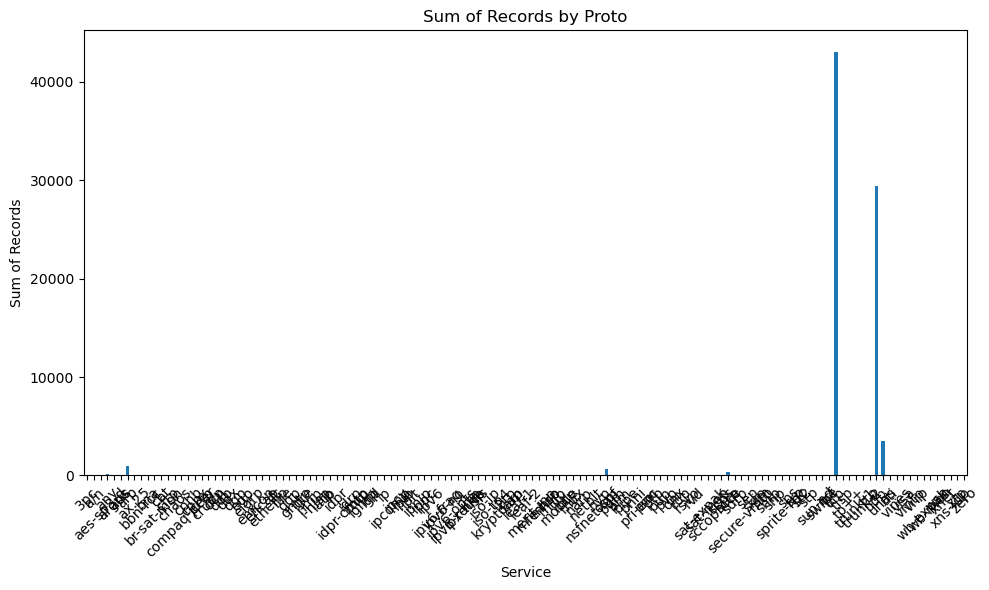

In [11]:
# Group data by 'proto' and calculate the sum for each category
proto_sum = train_df_pandas.groupby('proto').size()

# Plotting
plt.figure(figsize=(10, 6))
proto_sum.plot(kind='bar')
plt.title('Sum of Records by Proto')
plt.xlabel('Service')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
proto_sum

proto
3pc          32
a/n          32
aes-sp3-d    32
any          96
argus        33
             ..
wsn          32
xnet         33
xns-idp      34
xtp          32
zero         32
Length: 131, dtype: int64

#### Service Attributes:
- Convert '-' to 0
- The rest normal

In [13]:
# Read the unique values of the column 'service' in the dataframe 'train_df_pandas' 
unique_values = train_df_pandas['service'].unique()
unique_values

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

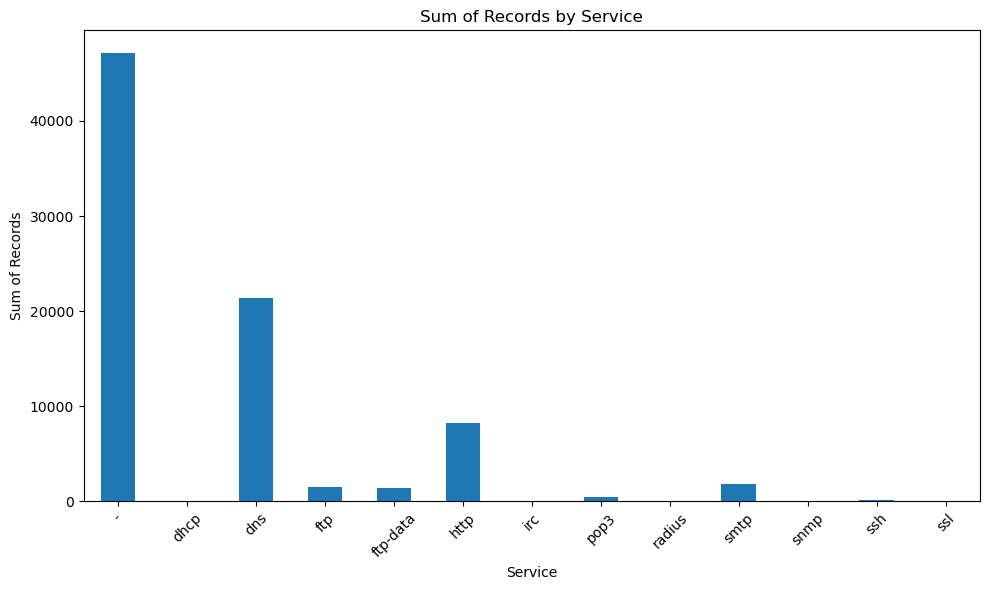

In [14]:
# Group data by 'service' and calculate the sum for each category
service_sum = train_df_pandas.groupby('service').size()

# Plotting
plt.figure(figsize=(10, 6))
service_sum.plot(kind='bar')
plt.title('Sum of Records by Service')
plt.xlabel('Service')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
service_sum

service
-           47153
dhcp           26
dns         21367
ftp          1552
ftp-data     1396
http         8287
irc             5
pop3          423
radius          9
smtp         1851
snmp           29
ssh           204
ssl            30
dtype: int64

#### State Attribute:

In [16]:
# Read the unique values of the column 'state' in the dataframe 'train_df_pandas' 
unique_values = train_df_pandas['state'].unique()
unique_values

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

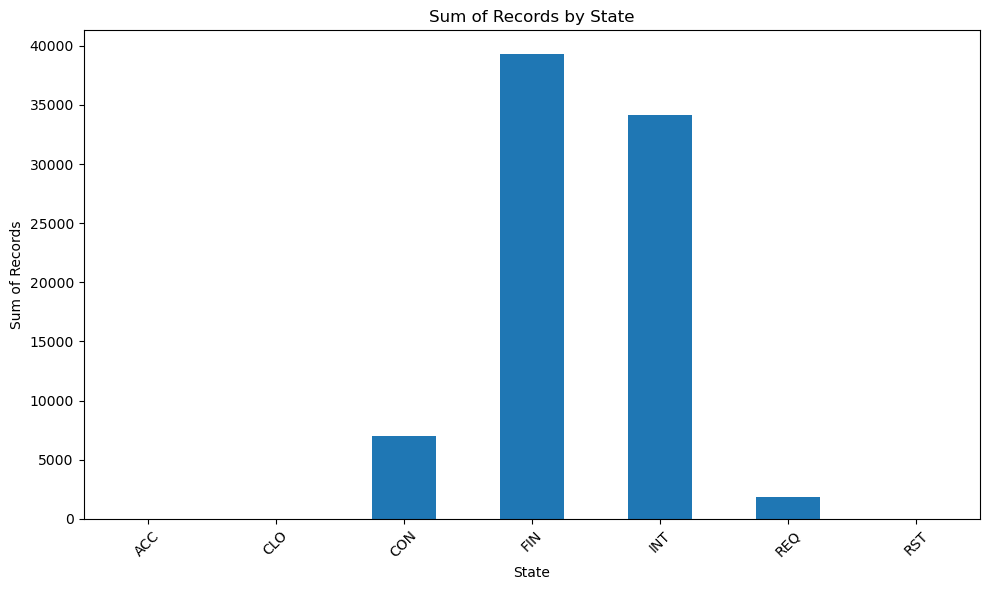

In [17]:
# Group data by 'state' and calculate the sum for each category
state_sum = train_df_pandas.groupby('state').size()

# Plotting
plt.figure(figsize=(10, 6))
state_sum.plot(kind='bar')
plt.title('Sum of Records by State')
plt.xlabel('State')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
state_sum

state
ACC        4
CLO        1
CON     6982
FIN    39339
INT    34163
REQ     1842
RST        1
dtype: int64

#### Attack_cat Attribute:

In [19]:
# Read the unique values of the column 'attack_cat' in the dataframe 'train_df_pandas' 
# Target variable: attack_cat
unique_values = train_df_pandas['attack_cat'].unique()
unique_values

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

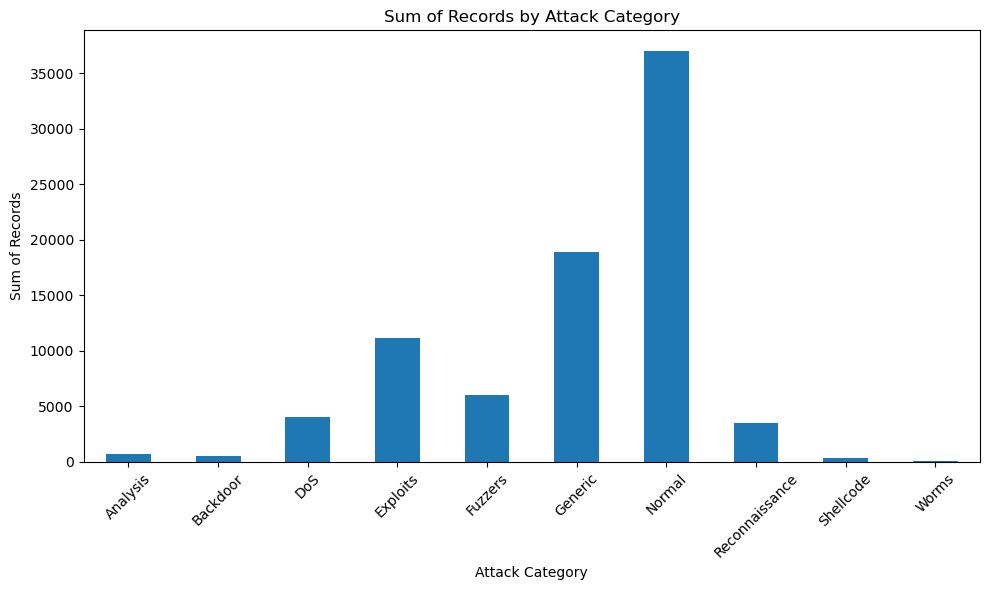

In [20]:
# Group data by 'attack_cat' and calculate the sum for each category
attack_cat_sum = train_df_pandas.groupby('attack_cat').size()

# Plotting
plt.figure(figsize=(10, 6))
attack_cat_sum.plot(kind='bar')
plt.title('Sum of Records by Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('Sum of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
attack_cat_sum

attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
dtype: int64

In [22]:
data = {
    'attack_cat': ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
    'count': [677, 583, 4089, 11132, 6062, 18871, 37000, 3496, 378, 44]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the total count of records
total_count = df['count'].sum()

# Calculate the percentage for each attribute
df['percentage'] = (df['count'] / total_count) * 100

print(df)

       attack_cat  count  percentage
0        Analysis    677    0.822281
1        Backdoor    583    0.708109
2             DoS   4089    4.966477
3        Exploits  11132   13.520867
4         Fuzzers   6062    7.362872
5         Generic  18871   22.920614
6          Normal  37000   44.939999
7  Reconnaissance   3496    4.246223
8       Shellcode    378    0.459117
9           Worms     44    0.053442


#### is_sm_ips_ports Attribute:

In [25]:
unique_values = train_df_pandas['is_sm_ips_ports'].unique()
unique_values

array(['0', '1'], dtype=object)

## Data Visualisation

# Prepare the data

### Convert Pandas back to Spark

In [23]:
# Convert Pandas DataFrames back to Spark DataFrames
train_df_spark = spark.createDataFrame(train_df_pandas)
test_df_spark = spark.createDataFrame(test_df_pandas)

# Model selection and training
- Select machine learning models (Logistic Regression , Decision Tree, Random Forest, Multilayer perceptron).
- Split the data into training and validation sets.
- Train the selected models using the training data.

## Logistic Regression model

### Default Model

###  Fine-Tuning 

### Evaluation

## Decision Tree Model

### Default Model

###  Fine-Tuning 

### Evaluation

## Random Forest Model

### Default Model

###  Fine-Tuning 

### Evaluation

## Multilayer perceptron Model

### Default Model

###  Fine-Tuning 

### Evaluation

# Final comparison between Models